# Import libraries

In [36]:
import numpy as np
import pandas as pd
import random
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Import Data

In [37]:
data = sns.load_dataset('titanic')

# Preprocessing

In [38]:
df = data.copy()

In [39]:
train_set, test_set = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df['survived']
)

In [40]:
train_set['FamilySize'] = train_set['sibsp'] + train_set['parch'] + 1
train_set['IsAlone'] = (train_set['FamilySize'] == 1).astype(int)
train_set['Age*Class'] = train_set['age'] * train_set['pclass']
train_set['FarePerPerson'] = train_set['fare'] / train_set['FamilySize']
train_set['is_female'] = (train_set['sex'] == 'female').astype(int)
train_set['is_child'] = (train_set['age'] < 15).astype(int)


In [41]:
test_set['FamilySize'] = test_set['sibsp'] + test_set['parch'] + 1
test_set['IsAlone'] = (test_set['FamilySize'] == 1).astype(int)
test_set['Age*Class'] = test_set['age'] * test_set['pclass']
test_set['FarePerPerson'] = test_set['fare'] / test_set['FamilySize']
test_set['is_female'] = (test_set['sex'] == 'female').astype(int)
test_set['is_child'] = (test_set['age'] < 15).astype(int)


In [42]:
train_set.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,deck,embark_town,alive,alone,FamilySize,IsAlone,Age*Class,FarePerPerson,is_female,is_child
692,1,3,male,NaN,0,0,56.4958,S,Third,man,...,NaN,Southampton,yes,True,1,1,NaN,56.4958,0,0
481,0,2,male,NaN,0,0,0.0000,S,Second,man,...,NaN,Southampton,no,True,1,1,NaN,0.0000,0,0
527,0,1,male,NaN,0,0,221.7792,S,First,man,...,C,Southampton,no,True,1,1,NaN,221.7792,0,0
855,1,3,female,18.0,0,1,9.3500,S,Third,woman,...,NaN,Southampton,yes,False,2,0,54.0,4.6750,1,0
801,1,2,female,31.0,1,1,26.2500,S,Second,woman,...,NaN,Southampton,yes,False,3,0,62.0,8.7500,1,0


In [43]:
train_set.describe()

,survived,pclass,age,sibsp,parch,fare,FamilySize,IsAlone,Age*Class,FarePerPerson,is_female,is_child
count,712.000000,712.000000,575.000000,712.000000,712.000000,712.000000,712.000000,712.000000,575.00000,712.000000,712.000000,712.000000
mean,0.383427,2.308989,29.807687,0.492978,0.390449,31.819826,1.883427,0.609551,62.85320,20.396663,0.355337,0.085674
std,0.486563,0.833563,14.485211,1.060720,0.838134,48.059104,1.589047,0.488194,35.39968,37.715099,0.478952,0.280079
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.92000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,1.000000,0.000000,39.00000,7.250000,0.000000,0.000000
50%,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200,1.000000,1.000000,58.00000,8.445800,0.000000,0.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000,2.000000,1.000000,84.00000,20.481250,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000,222.00000,512.329200,1.000000,1.000000


In [44]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   survived       712 non-null    int64   
 1   pclass         712 non-null    int64   
 2   sex            712 non-null    object  
 3   age            575 non-null    float64 
 4   sibsp          712 non-null    int64   
 5   parch          712 non-null    int64   
 6   fare           712 non-null    float64 
 7   embarked       710 non-null    object  
 8   class          712 non-null    category
 9   who            712 non-null    object  
 10  adult_male     712 non-null    bool    
 11  deck           159 non-null    category
 12  embark_town    710 non-null    object  
 13  alive          712 non-null    object  
 14  alone          712 non-null    bool    
 15  FamilySize     712 non-null    int64   
 16  IsAlone        712 non-null    int64   
 17  Age*Class      575 non-null    float64

In [45]:
train_set.shape

(712, 21)

In [46]:
train_set.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'FamilySize', 'IsAlone', 'Age*Class', 'FarePerPerson',
       'is_female', 'is_child'],
      dtype='object')

In [47]:
train_set.duplicated().sum()

71

In [48]:
train_set.isnull().sum()

survived           0
pclass             0
sex                0
age              137
sibsp              0
parch              0
fare               0
embarked           2
class              0
who                0
adult_male         0
deck             553
embark_town        2
alive              0
alone              0
FamilySize         0
IsAlone            0
Age*Class        137
FarePerPerson      0
is_female          0
is_child           0
dtype: int64

In [49]:
train_set = train_set.drop(columns=['alive', 'class', 'adult_male', 'deck', 'embark_town', 'who'], errors='ignore')
test_set = test_set.drop(columns=['alive', 'class', 'adult_male', 'deck', 'embark_town', 'who'], errors='ignore')

X_train = train_set.drop(columns=['survived'])
y_train = train_set['survived']
X_test = test_set.drop(columns=['survived'])
y_test = test_set['survived']


In [50]:
print(pd.Series(y_train).value_counts(normalize=True))

survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64


In [51]:
print(pd.Series(y_train).value_counts(normalize=True))

survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64


In [52]:
#Find out which features are categorical, numerical or heavy-tailed
categorical_cols = X_train.select_dtypes(include='object').columns
numeric_cols = X_train.select_dtypes(include=np.number).columns

print("Categorical features: ", categorical_cols)
print("Numerical features: ", numeric_cols)

from scipy.stats import skew
numeric_cols = X_train.select_dtypes(include=np.number).columns
skewed_feats = X_train[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_features = skewed_feats[skewed_feats > 0.8].index.tolist()
skewed_features = [col for col in skewed_features if col in X_train.columns]

print("High skew features:", skewed_features)

Categorical features:  Index(['sex', 'embarked'], dtype='object')
Numerical features:  Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'FamilySize', 'IsAlone',
       'Age*Class', 'FarePerPerson', 'is_female', 'is_child'],
      dtype='object')
High skew features: ['FarePerPerson', 'fare', 'sibsp', 'is_child', 'parch', 'FamilySize', 'Age*Class']


In [53]:
numeric_cols = list(numeric_cols)
num_features_with_target = numeric_cols + ["survived"]

cols_to_use = [col for col in num_features_with_target]

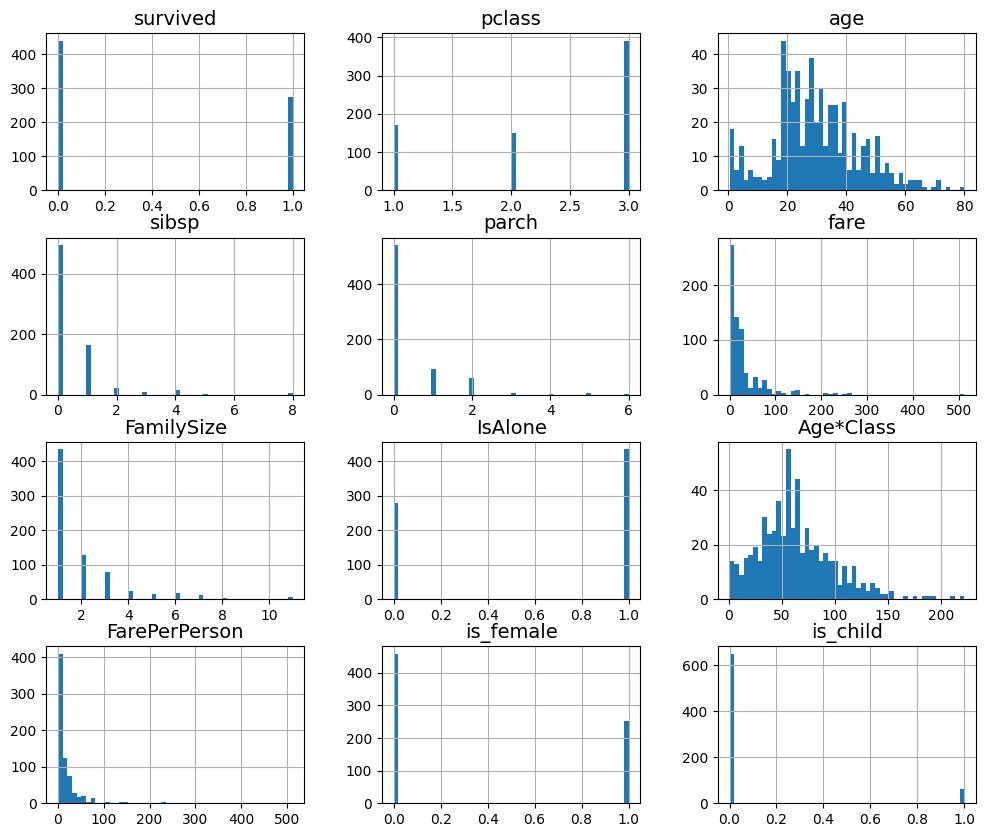

In [54]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train_set.hist(bins=50, figsize=(12, 10))
plt.show()

## Create a pipeline for a better preprocessing

In [55]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

log_transformer = make_pipeline(                      
    SimpleImputer(strategy="median"),
    FunctionTransformer(lambda x: np.log1p(np.clip(x, a_min=0, a_max=None)), feature_names_out="one-to-one"),
    StandardScaler()
)

numeric_transformer = make_pipeline(              
    SimpleImputer(strategy="median"),
    StandardScaler()
)

categorical_transformer = make_pipeline(                       
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessor = ColumnTransformer([                       
    ("log", log_transformer, skewed_features),
    
    ("num", numeric_transformer, list(set(numeric_cols) - set(skewed_features))),

    ("cat", categorical_transformer, categorical_cols),
])



## Train and evaluate different models

In [56]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
def evaluation(model):
    
    
    y_pred = cross_val_predict(model, X_train, y_train, cv=4)
    print(confusion_matrix(y_train, y_pred))
    print(classification_report(y_train, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='recall',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    
    

In [58]:
log_reg = Pipeline([
    ("preprocessor", preprocessor),
    ("log_reg", LogisticRegression(max_iter=1000, random_state=42)),
])

rf_clf = Pipeline([
    ("preprocessor", preprocessor),
    ("rf_clf", RandomForestClassifier(random_state=42)),
])

gb_clf = Pipeline([
    ("preprocessor", preprocessor),
    ("gb_clf", GradientBoostingClassifier(random_state=42)),
])


knn_clf = Pipeline([
    ("preprocessor", preprocessor),
    ("knn_clf", KNeighborsClassifier()),
]) 

svc_clf = Pipeline([
    ("prepocessor", preprocessor),
    ("svc_clf", SVC(random_state=42, probability=True)),
])



In [59]:
dict_of_models = {'Log Reg':log_reg ,
                  'Random Forest' : rf_clf,
                  'Gradient boosting ':gb_clf ,
                  'KNN' : knn_clf ,
                  'SVC' : svc_clf
                 }

Log Reg
[[377  62]
 [ 79 194]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       439
           1       0.76      0.71      0.73       273

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712

Random Forest
[[377  62]
 [ 77 196]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       439
           1       0.76      0.72      0.74       273

    accuracy                           0.80       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.80      0.80      0.80       712

Gradient boosting 
[[389  50]
 [ 80 193]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       439
           1       0.79      0.71      0.75       273

    accuracy                           0.82       712
   macro avg      

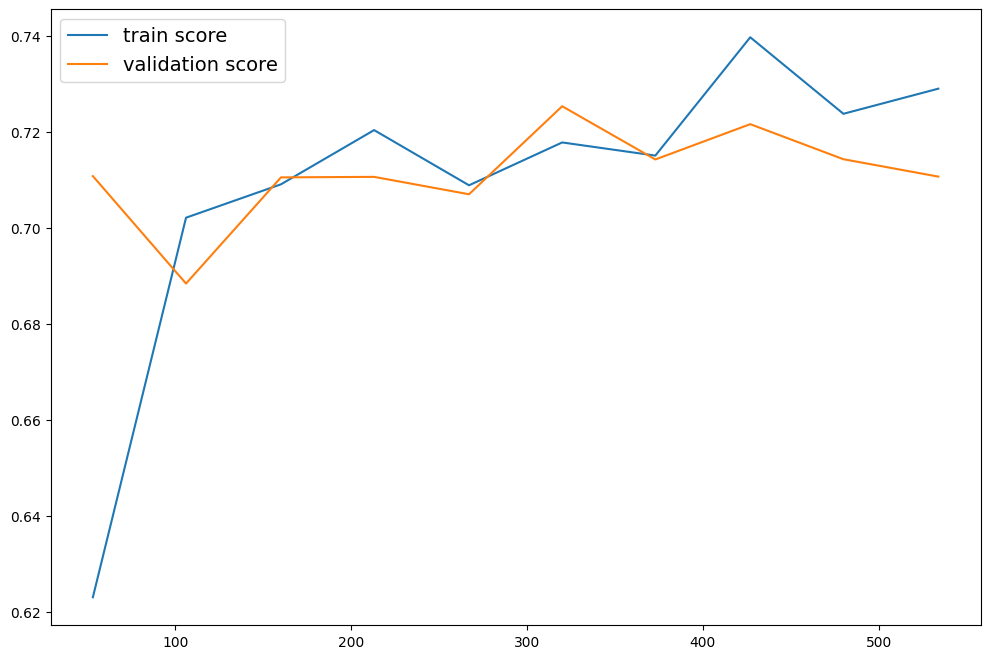

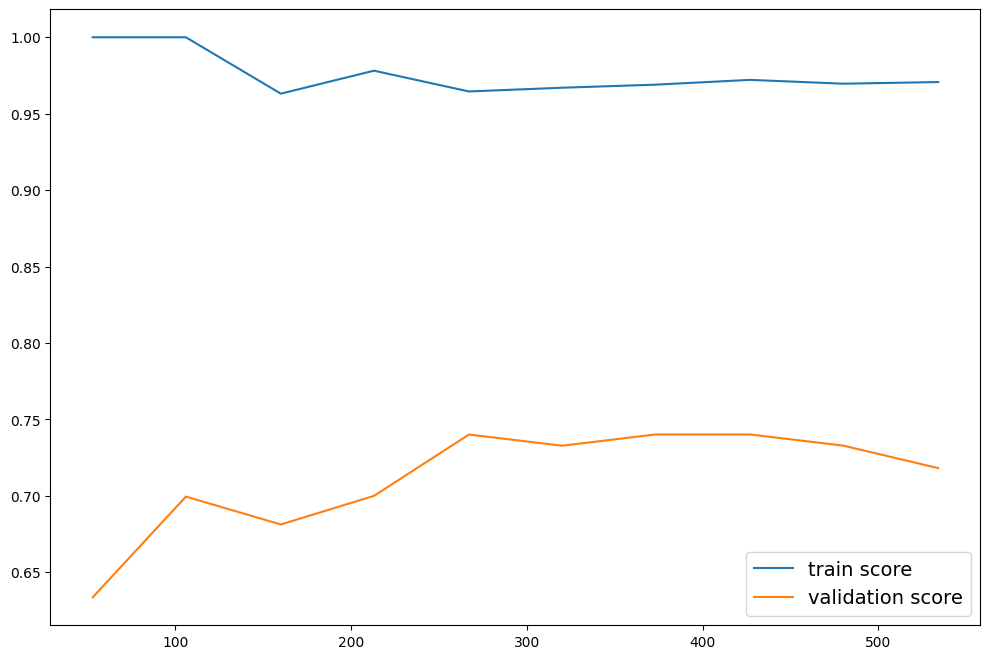

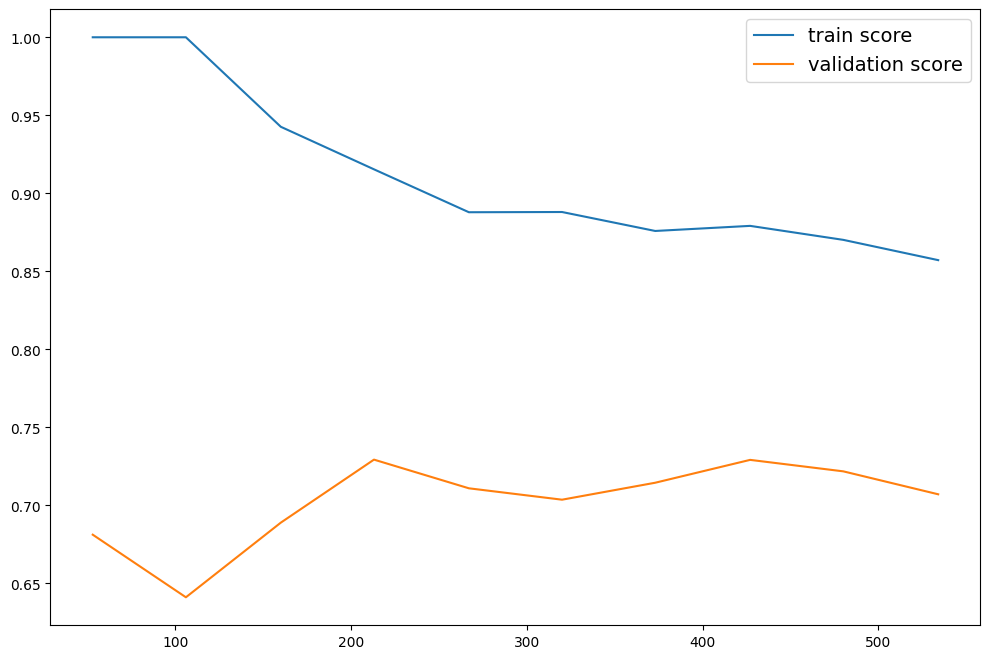

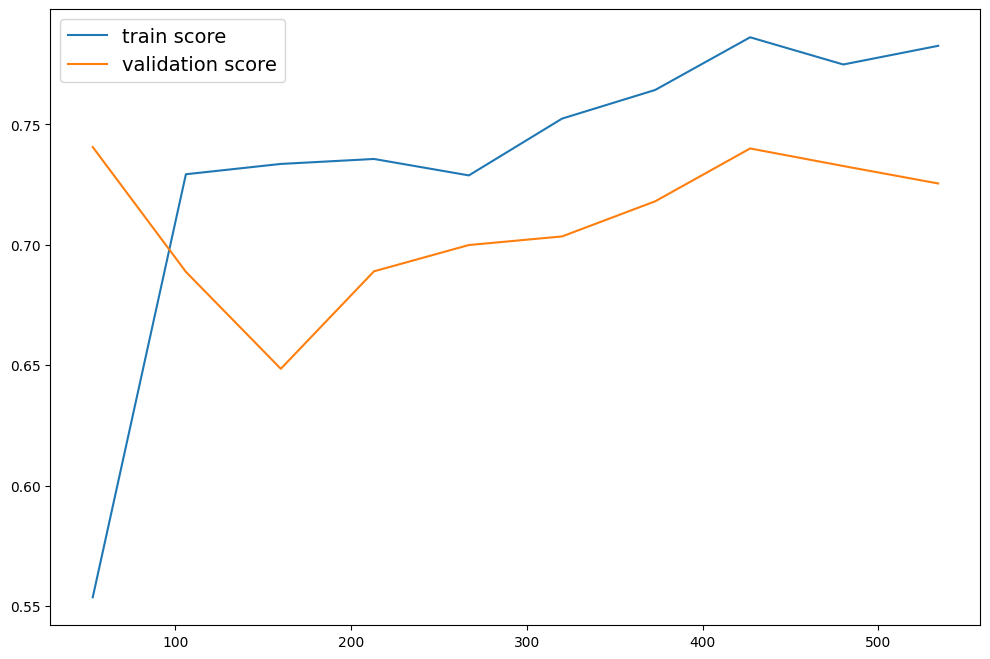

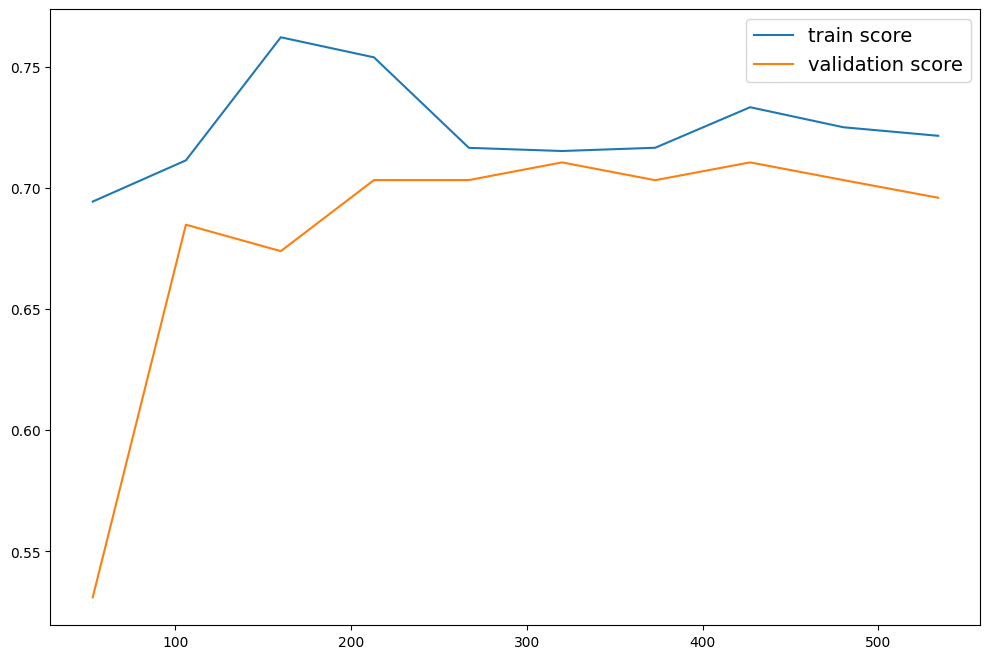

In [60]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

## Optimization

### Use random search to choose the best hyperparameters

In [61]:
#RANDOMISE SEARCH FOR Logistic regression
from sklearn.model_selection import RandomizedSearchCV
log_params = {
    "log_reg__C": [0.1, 1, 10, 100],
    "log_reg__penalty": ["l2"],
    "log_reg__solver": ["lbfgs", "liblinear"],
}

log_search =RandomizedSearchCV(log_reg, log_params, scoring='recall', cv=4, n_iter=40)
log_search.fit(X_train, y_train)
print(log_search.best_params_)

best_model = log_search.best_estimator_
y_oof = cross_val_predict(best_model, X_train, y_train, cv=4)
print(confusion_matrix(y_train, y_oof))
print(classification_report(y_train, y_oof))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=40. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'log_reg__solver': 'liblinear', 'log_reg__penalty': 'l2', 'log_reg__C': 0.1}
[[377  62]
 [ 76 197]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       439
           1       0.76      0.72      0.74       273

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.80      0.81      0.81       712



[[377  62]
 [ 76 197]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       439
           1       0.76      0.72      0.74       273

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.80      0.81      0.81       712



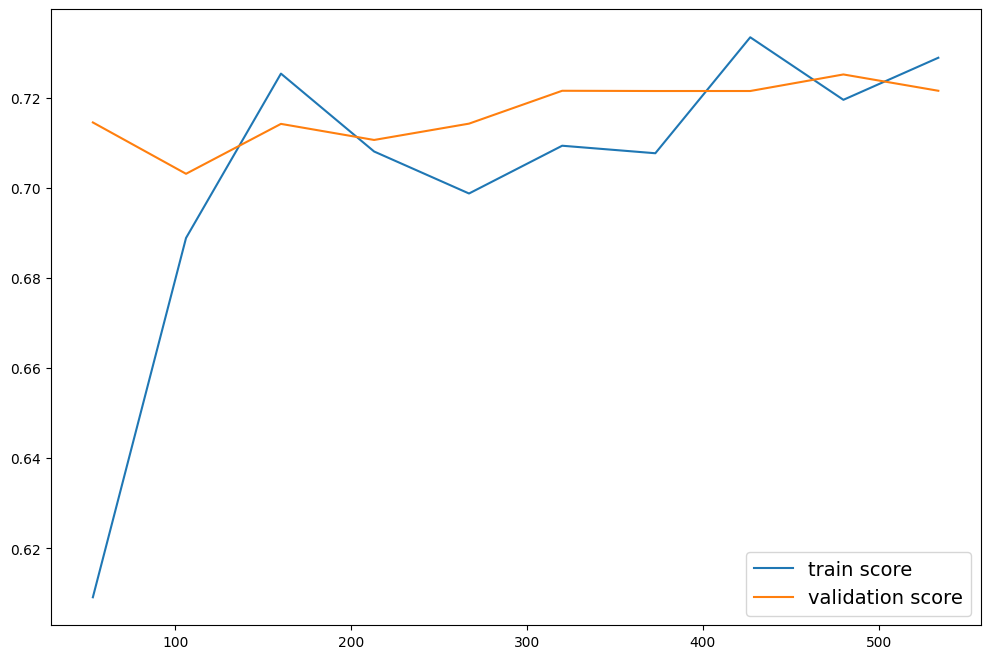

In [62]:
evaluation(log_search.best_estimator_)

## Precision Recall Curve

In [63]:
from sklearn.metrics import precision_recall_curve

In [64]:
precision, recall, threshold = precision_recall_curve(y_test, log_search.best_estimator_.decision_function(X_test))

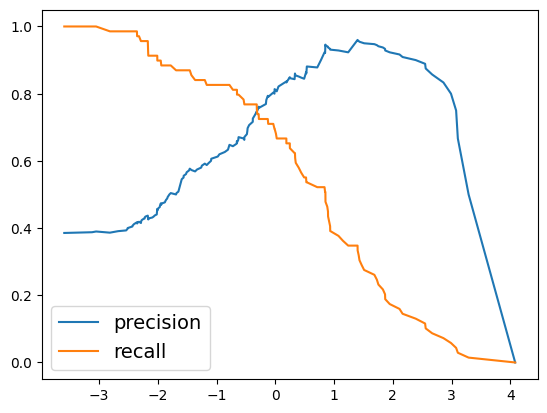

In [65]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [66]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [67]:
y_pred = model_final(log_search.best_estimator_, X_test, threshold=-1)

In [68]:
f1_score(y_test, y_pred)

0.7037037037037037

In [69]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8260869565217391